# **Предобработка данных**

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, roc_auc_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

Читаем данные из дата сета

In [2]:
df = pd.read_csv("data/diabetes.csv")

Посмотрим сводную таблицу признаков и на количество дубликатов

In [3]:
df.info()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


np.int64(0)

Можно заметить, что дубликатов в выборке нет, также нет пропущенных значений. Тип данных также соответствуют признакам. Посмотрим на аномальные значения датафрейма

##**Проверка на аномальность данных**

In [4]:
new_df = df.copy()

Проанализируем уровень глюкозы в крови

In [5]:
new_df['Glucose'].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

Видно, что минимальное значение равно 0. Обычно, уровень глюкозы редко опускается ниже 60-70 мг/дл. Исключим все нулевые признаки из датафрейма

In [6]:
new_df = new_df[new_df['Glucose'] != 0]
new_df['Glucose'].min()

np.int64(44)

In [7]:
new_df['BloodPressure'].describe()

count    763.000000
mean      69.115334
std       19.399240
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

Нулевой уровень давления... Это что-то интересное. Избавимся от него и отберем те, которые не ниже 40, поскольку очень редко и практически невозможно встретить давление ниже 40

In [8]:
new_df = new_df[new_df['BloodPressure'] >= 40]
new_df['BloodPressure'].min()

np.int64(40)

По аналогии избавимся от нулевых показателей для SkinThickness

In [9]:
new_df['SkinThickness'].describe()

count    724.000000
mean      21.345304
std       15.741676
min        0.000000
25%        0.000000
50%       24.000000
75%       33.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [10]:
new_df = new_df[new_df['SkinThickness'] != 0]
new_df['SkinThickness'].min()

np.int64(7)

Можно так же на гистограмме увидеть аномальные значения около ста. Возможно, это выбросы. Отфильтруем те записи, которые меньше 80. (Взял значение чисто эмпирическим путём)

<Axes: >

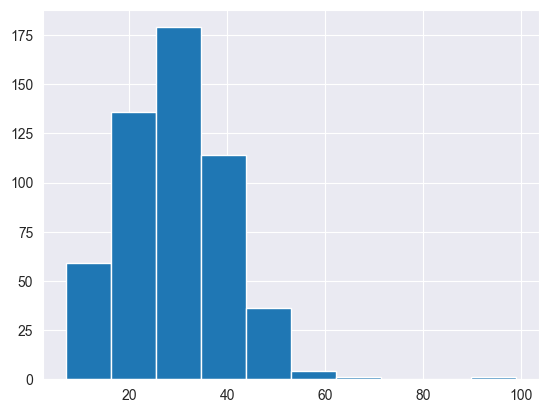

In [11]:
new_df['SkinThickness'].hist()

<Axes: >

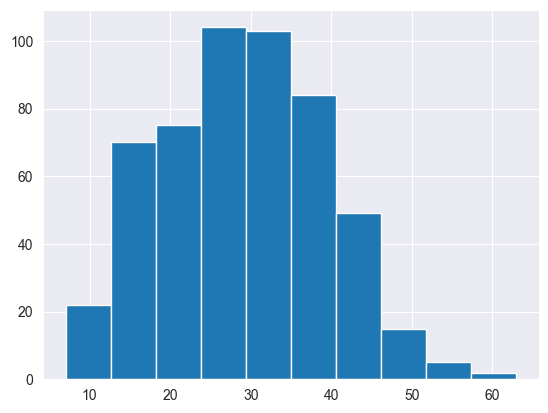

In [12]:
new_df = new_df[new_df['SkinThickness'] < 80]
new_df['SkinThickness'].hist()

Аналогично с другими признаками исключим нулевые значения у Insulin

In [13]:
new_df['Insulin'].describe()

count    529.000000
mean     115.190926
std      123.289338
min        0.000000
25%        0.000000
50%       91.000000
75%      166.000000
max      846.000000
Name: Insulin, dtype: float64

<Axes: >

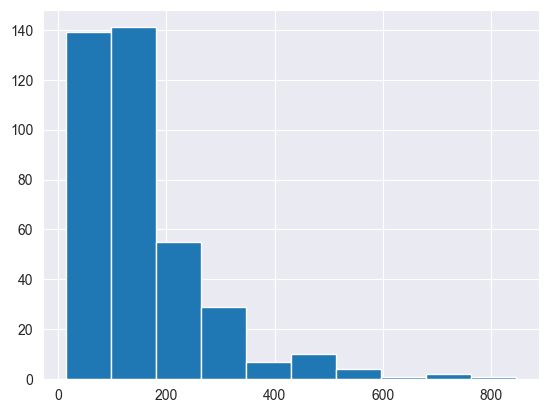

In [14]:
new_df = new_df[new_df["Insulin"] != 0]
new_df['Insulin'].hist()

Проанализируем BMI

count    389.000000
mean      32.957841
std        7.123142
min        0.000000
25%       28.400000
50%       33.200000
75%       37.000000
max       67.100000
Name: BMI, dtype: float64


<Axes: >

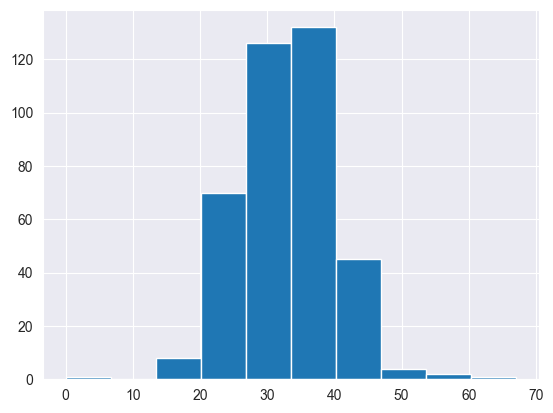

In [15]:
print(new_df['BMI'].describe())
new_df['BMI'].hist()

Значения в отрезке [0, 10] очень мало. Да и практически ИМТ не может быть около 0. Избавимся от этих данных

<Axes: >

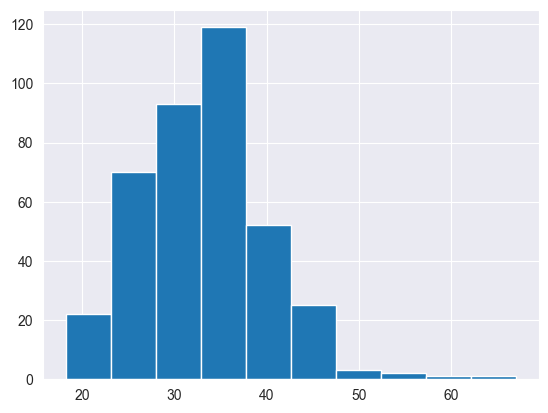

In [16]:
new_df = new_df[new_df['BMI']>10]
new_df['BMI'].hist()

Проанализируем DiabetesPedigreeFunction

count    388.000000
mean       0.524198
std        0.346779
min        0.085000
25%        0.269750
50%        0.449500
75%        0.687000
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64


<Axes: >

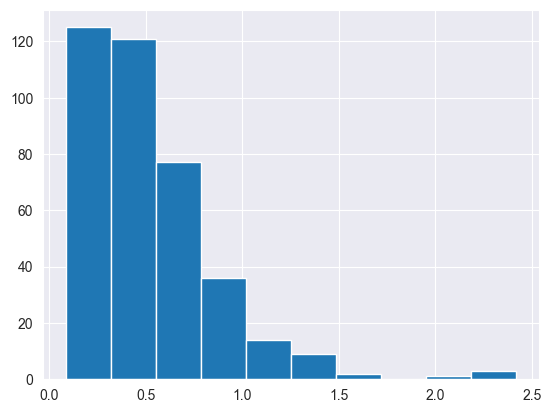

In [17]:
print(new_df['DiabetesPedigreeFunction'].describe())
new_df['DiabetesPedigreeFunction'].hist()

Около 2 можно увидеть выбросы - основная масса значений сосредоточены между 0 и 1. Избавимся от выбросов

<Axes: >

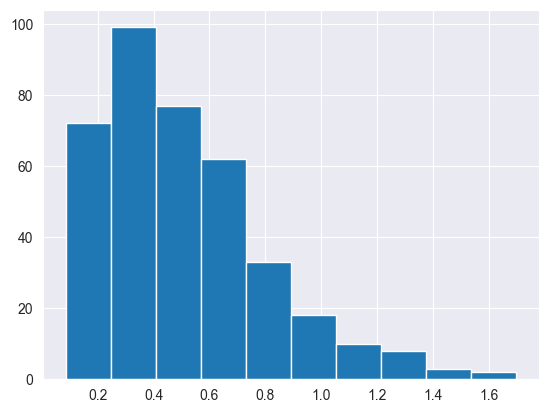

In [18]:
new_df = new_df[new_df['DiabetesPedigreeFunction']<2]
new_df['DiabetesPedigreeFunction'].hist()

И наконец-то рассмотрим признак Age

count    384.000000
mean      30.934896
std       10.278291
min       21.000000
25%       23.000000
50%       27.000000
75%       36.000000
max       81.000000
Name: Age, dtype: float64


<Axes: >

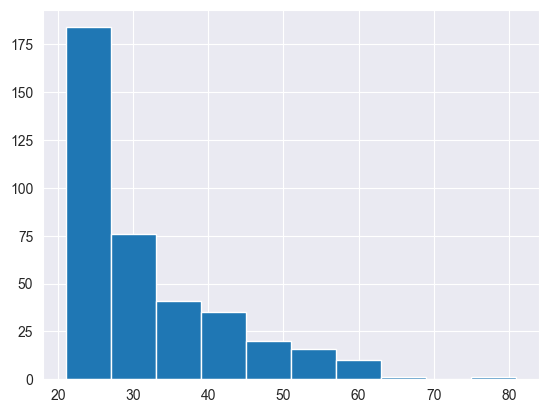

In [19]:
print(new_df['Age'].describe())
new_df['Age'].hist()

В принципе можно было бы избавиться от значений около 80, считая их выбросами, чтобы в дальнейшем не искажать статистику, но эти данные не протеворечат предметной области. Думаю, их можно оставить

#**Анализ данных**

##Типы данных



 **Pregnancies**     количественный непрерывный тип данных, абсолютная шкала

 **Glucose**         количественный непрерывный тип данных, шкала отношений

 **BloodPressure**   количественный непрерывный тип данных, шкала отношений

 **SkinThickness**   количественный непрерывный тип данных, шкала отношений

 **Insulin**         количественный непрерывный тип данных, шкала отношений

 **BMI**             количественный непрерывный тип данных, шкала отношений

 **DiabetesPedigreeFunction**  количественный непрерывный тип данных, шкала
 отношений

 **Age**             количественный непрерывный тип данных, шкала отношений

 **Outcome**         категориальный тип данных, номинативная шкала

## Визуализация

<Axes: >

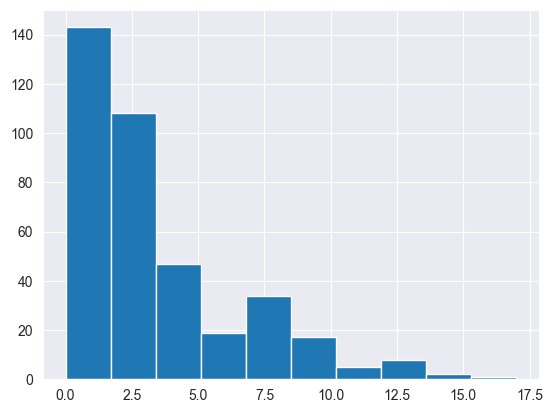

In [20]:
new_df['Pregnancies'].hist()

<Axes: >

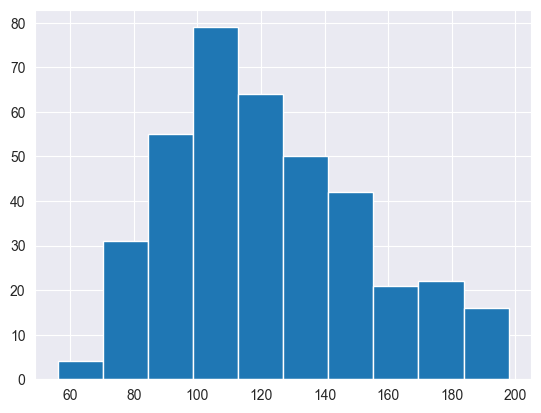

In [21]:
new_df['Glucose'].hist()

<Axes: >

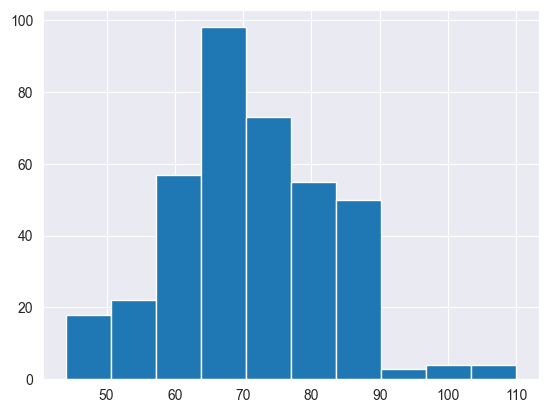

In [22]:
new_df['BloodPressure'].hist()

<Axes: >

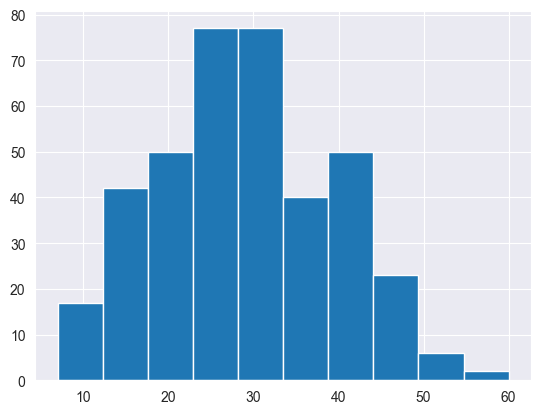

In [23]:
new_df['SkinThickness'].hist()

<Axes: >

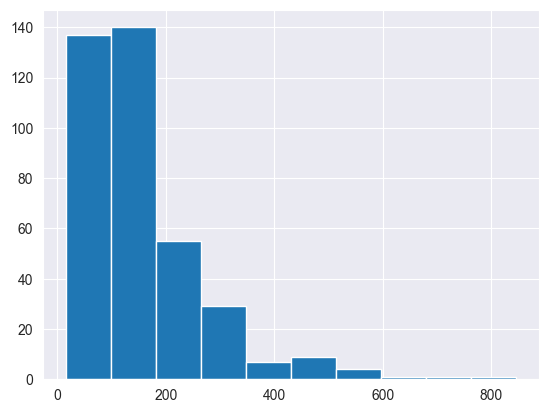

In [24]:
new_df['Insulin'].hist()

<Axes: >

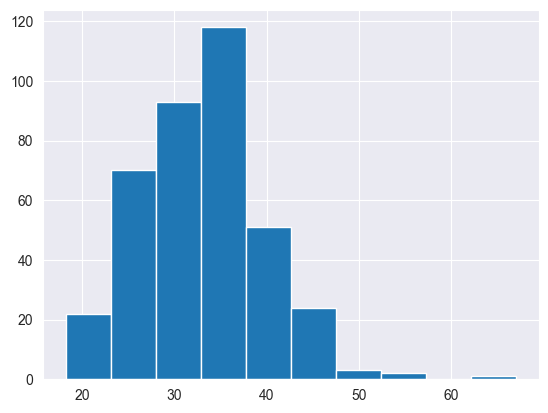

In [25]:
new_df['BMI'].hist()

<Axes: >

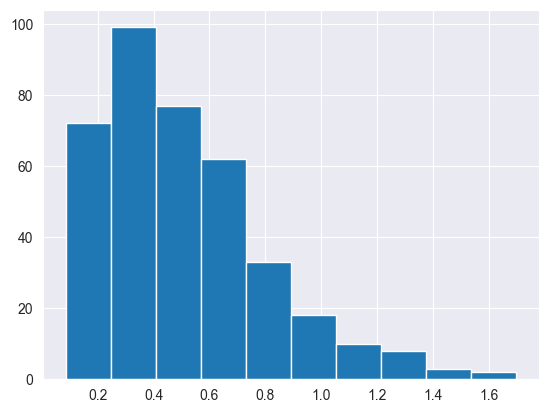

In [26]:
new_df["DiabetesPedigreeFunction"].hist()

<Axes: >

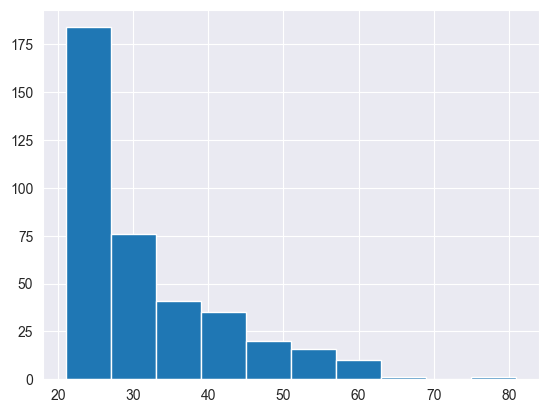

In [27]:
new_df["Age"].hist()

<Axes: >

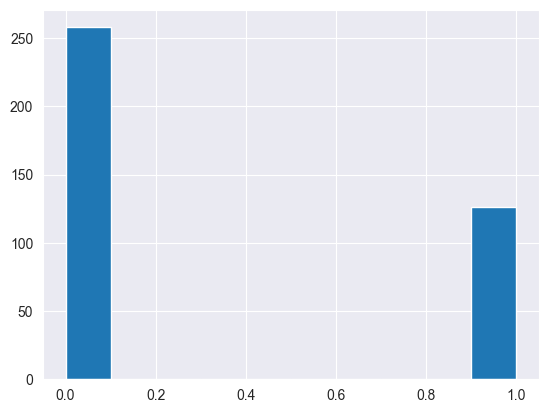

In [28]:
new_df["Outcome"].hist()

#**Статистические критерии сравнения групп**

##BMI

Определим количество групп категориального признака. Всего два варианта - есть диабет или его нет

In [29]:
new_df.groupby('Outcome')['BMI'].mean()

Outcome
0    31.735659
1    35.358730
Name: BMI, dtype: float64

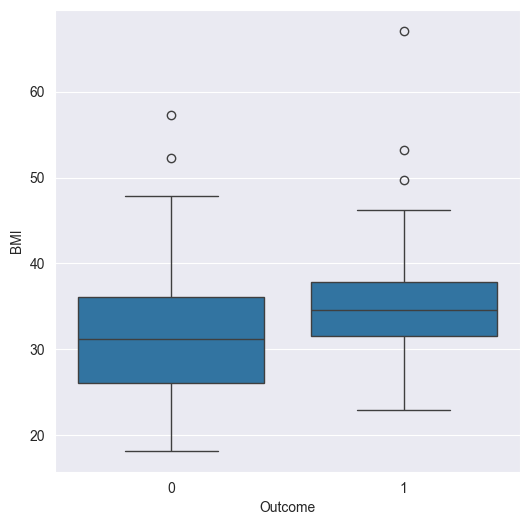

In [30]:
f, ax = plt.subplots(figsize = (6, 6))
fig = sns.boxplot(x = 'Outcome', y = 'BMI', data = new_df)

Оценим взаимосвязь категриального признака наличие сахарного диабета (Outcome) и индекса массы тела (BMI). Посмотрим, подчиняется ли нормальному закону распределения индекс массы по каждой группе. Возьпользуемся критерием Шапиро-Уилка.
**H0 - наличие нормального закона распределения**

In [31]:
df_o0 = new_df[new_df['Outcome'] == 0]
df_o1 = new_df[new_df['Outcome'] == 1]

In [32]:
print('Отсутсвие диабета: ')
p_value = stats.shapiro(df_o0['BMI']).pvalue
if (p_value > 0.05):
  print('H0 - принимается. Нормальный закон распределения. P-value = ', p_value)
else:
  print('H0 - отвергается. Иной вид распределения. P-value = ', p_value)

print('Наличие диабета: ')
p_value = stats.shapiro(df_o1['BMI']).pvalue
if (p_value > 0.05):
  print('H0 - принимается. Нормальный закон распределения. P-value = ', p_value)
else:
  print('H0 - отвергается. Иной вид распределения. P-value = ', p_value)

Отсутсвие диабета: 
H0 - отвергается. Иной вид распределения. P-value =  0.004687248878619743
Наличие диабета: 
H0 - отвергается. Иной вид распределения. P-value =  5.4964712517551526e-06


И наконец определим зависимость. Данные будут независимые т.к имт одной группы никак не влияет на имт другой

Исходя из анализа данных по количеству групп, зависимость выборок из каждой группы, а также принедлежности нормальному закону распределения, был выбран непараметрический статистический критерий Манна-Утни. Сформулируем нулевую гипотезу:

**Н0 - выборки не имеют статитески значимых отличий.**

In [33]:
stats.mannwhitneyu(df_o0['BMI'], df_o1['BMI'])

MannwhitneyuResult(statistic=np.float64(11182.0), pvalue=np.float64(6.831162560482272e-07))

*P-value* значительно меньше чем заданный уровень значимости, равный 0,05, значит нулевая гипотеза отвергается, принимается альтернативная гипотеза о статестических различиях выборок. Если говорить про предметную область, то можно сделать вывод, что мы не нашли никакой закономерности и "схожесть" между двумя выборками -  имеет смысл значение имт на попадение в одну или другую группу т.к данные не являются случайными выборками из одной и той же группы

По аналогии проведем статистический анализ для других количественных факторов с помощью критериев сравнения групп

##Age

In [34]:
new_df.groupby('Outcome')['Age'].mean()

Outcome
0    28.356589
1    36.214286
Name: Age, dtype: float64

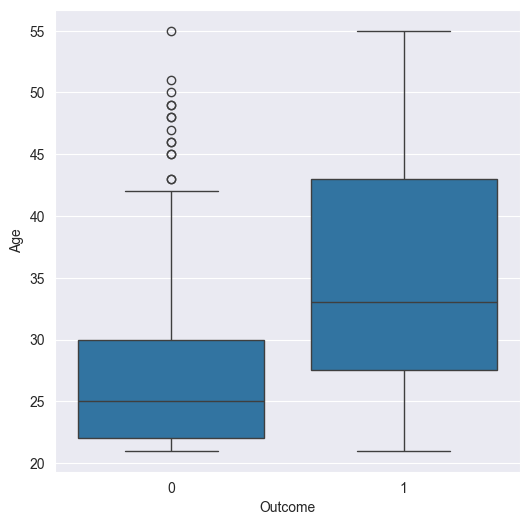

In [35]:
Q1 = new_df['Age'].quantile(0.25)
Q3 = new_df['Age'].quantile(0.75)
IQR = Q3 - Q1

new_df_filtered = new_df[(new_df['Age'] >= Q1 - 1.5 * IQR) & (new_df['Age'] <= Q3 + 1.5 * IQR)]

f, ax = plt.subplots(figsize=(6, 6))
sns.boxplot(x="Outcome", y="Age", data=new_df_filtered)
plt.show()

In [36]:
print('Отсутсвие диабета: ')
p_value = stats.shapiro(df_o0['Age']).pvalue
if (p_value > 0.05):
  print('H0 - принимается. Нормальный закон распределения. P-value = ', p_value)
else:
  print('H0 - отвергается. Иной вид распределения. P-value = ', p_value)

print('Наличие диабета: ')
p_value = stats.shapiro(df_o1['Age']).pvalue
if (p_value > 0.05):
  print('H0 - принимается. Нормальный закон распределения. P-value = ', p_value)
else:
  print('H0 - отвергается. Иной вид распределения. P-value = ', p_value)

Отсутсвие диабета: 
H0 - отвергается. Иной вид распределения. P-value =  1.678623263975673e-19
Наличие диабета: 
H0 - отвергается. Иной вид распределения. P-value =  1.1099702336145637e-05


In [37]:
if stats.mannwhitneyu(df_o0['BMI'], df_o1['BMI']).pvalue > 0.05:
  print('Статистических значимых отличий нет')
else:
  print("Статистических значимые отличия присутствуют")

Статистических значимые отличия присутствуют


##BloodPressure

In [38]:
new_df.groupby('Outcome')['BloodPressure'].mean()

Outcome
0    69.410853
1    74.603175
Name: BloodPressure, dtype: float64

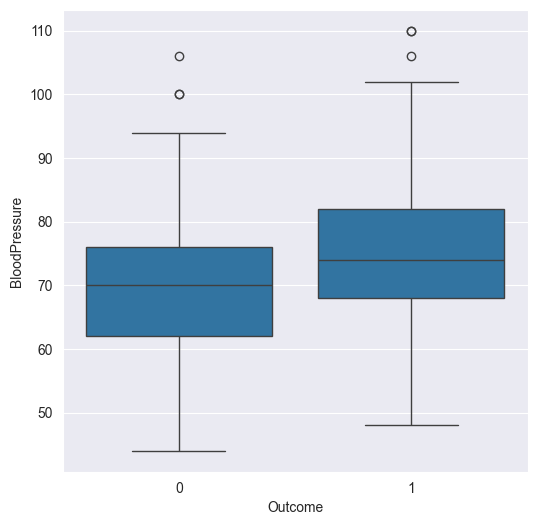

In [39]:
f, ax = plt.subplots(figsize = (6, 6))
fig = sns.boxplot(x = 'Outcome', y = 'BloodPressure', data = new_df)

In [40]:
print('Отсутсвие диабета: ')
p_value = stats.shapiro(df_o0['BloodPressure']).pvalue
if (p_value > 0.05):
  print('H0 - принимается. Нормальный закон распределения. P-value = ', p_value)
else:
  print('H0 - отвергается. Иной вид распределения. P-value = ', p_value)

print('Наличие диабета: ')
p_value = stats.shapiro(df_o1['BloodPressure']).pvalue
if (p_value > 0.05):
  print('H0 - принимается. Нормальный закон распределения. P-value = ', p_value)
else:
  print('H0 - отвергается. Иной вид распределения. P-value = ', p_value)

Отсутсвие диабета: 
H0 - принимается. Нормальный закон распределения. P-value =  0.12939641335017465
Наличие диабета: 
H0 - принимается. Нормальный закон распределения. P-value =  0.08816254691125908


Здесь картина немного поменяется поскольку выборки подченены нормальному закону распределения

Таким образом выборки подчиняются нормальному закону распределения, присутсвуют две группы. Воспользуемся критерием t-криетрием Стьюдента, предварительно проверив равенство дисперсий с помощью критерия Фишера

In [41]:
var_0 = np.var(df_o0['BloodPressure'], ddof=1)  # Выборочная дисперсия для группы 0
var_1 = np.var(df_o1['BloodPressure'], ddof=1)  # Выборочная дисперсия для группы 1
F = var_0 / var_1 if var_0 > var_1 else var_1 / var_0

df1 = len(df_o0['BloodPressure']) - 1  # Степени свободы для первой группы
df2 = len(df_o1['BloodPressure']) - 1  # Степени свободы для второй группы

p_value_f = 2 * min(stats.f.cdf(F, df1, df2), 1 - stats.f.cdf(F, df1, df2)) #Двусторонний тест

print('F-критерий Фишера для равенства дисперсий:')
print('F-статистика =', F)
print('P-value =', p_value_f)

p_value = 0
if p_value_f < 0.05:
  equal_variance = False
else:
  equal_variance = True
  if equal_variance:
      p_value = stats.ttest_ind(df_o0['BloodPressure'], df_o1['BloodPressure'], equal_var=True).pvalue
  else:
      p_value = stats.ttest_ind(df_o0['BloodPressure'], df_o1['BloodPressure'], equal_var=False).pvalue
if p_value > 0.05:
  print("p-value: ", p_value, " статистических значимых отличий нет")
else:
  print("p-value: ", p_value, " имеются статистические значимые отличия")

F-критерий Фишера для равенства дисперсий:
F-статистика = 1.185160347497666
P-value = 0.2841454477341192
p-value:  4.3887928150114574e-05  имеются статистические значимые отличия


*p-value* меньше чем уровень значимости, значит имеет смысл значение BloodPressure на попадение в одну или другую группу т.к данные не являются случайными выборками из одной и той же группы

##Pregnancies

In [42]:
new_df.groupby('Outcome')['Pregnancies'].mean()

Outcome
0    2.736434
1    4.579365
Name: Pregnancies, dtype: float64

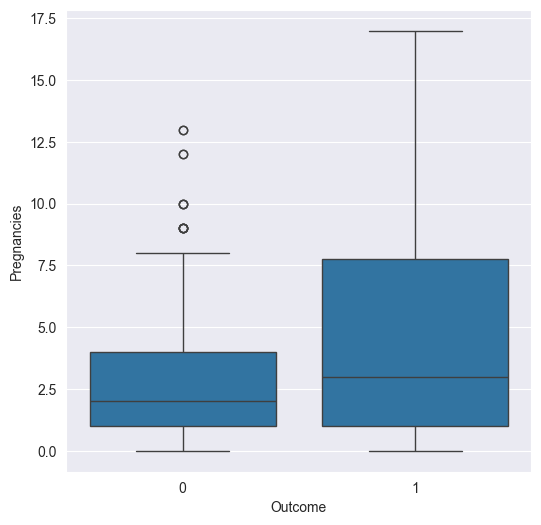

In [43]:
f, ax = plt.subplots(figsize = (6, 6))
fig = sns.boxplot(x = 'Outcome', y = 'Pregnancies', data = new_df)

In [44]:
print('Отсутсвие диабета: ')
p_value = stats.shapiro(df_o0['Pregnancies']).pvalue
if (p_value > 0.05):
  print('H0 - принимается. Нормальный закон распределения. P-value = ', p_value)
else:
  print('H0 - отвергается. Иной вид распределения. P-value = ', p_value)

print('Наличие диабета: ')
p_value = stats.shapiro(df_o1['Pregnancies']).pvalue
if (p_value > 0.05):
  print('H0 - принимается. Нормальный закон распределения. P-value = ', p_value)
else:
  print('H0 - отвергается. Иной вид распределения. P-value = ', p_value)

Отсутсвие диабета: 
H0 - отвергается. Иной вид распределения. P-value =  1.279854718492414e-15
Наличие диабета: 
H0 - отвергается. Иной вид распределения. P-value =  5.25333831907165e-07


In [45]:
if stats.mannwhitneyu(df_o0['Pregnancies'], df_o1['Pregnancies']).pvalue > 0.05:
  print('Статистических значимых отличий нет')
else:
  print("Статистических значимые отличия присутствуют")

Статистических значимые отличия присутствуют


##Glucose

In [46]:
new_df.groupby('Outcome')['Glucose'].mean()

Outcome
0    111.228682
1    145.214286
Name: Glucose, dtype: float64

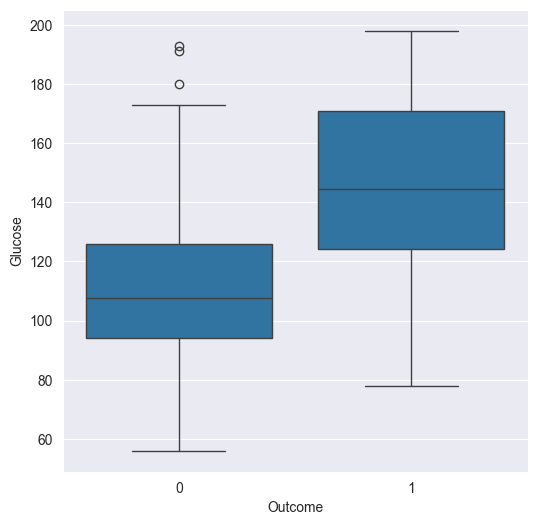

In [47]:
f, ax = plt.subplots(figsize = (6, 6))
fig = sns.boxplot(x = 'Outcome', y = 'Glucose', data = new_df)

In [48]:
print('Отсутсвие диабета: ')
p_value = stats.shapiro(df_o0['Glucose']).pvalue
if (p_value > 0.05):
  print('H0 - принимается. Нормальный закон распределения. P-value = ', p_value)
else:
  print('H0 - отвергается. Иной вид распределения. P-value = ', p_value)

print('Наличие диабета: ')
p_value = stats.shapiro(df_o1['Glucose']).pvalue
if (p_value > 0.05):
  print('H0 - принимается. Нормальный закон распределения. P-value = ', p_value)
else:
  print('H0 - отвергается. Иной вид распределения. P-value = ', p_value)

Отсутсвие диабета: 
H0 - отвергается. Иной вид распределения. P-value =  4.704993873372387e-05
Наличие диабета: 
H0 - отвергается. Иной вид распределения. P-value =  0.01747934021209476


In [49]:
if stats.mannwhitneyu(df_o0['Glucose'], df_o1['Glucose']).pvalue > 0.05:
  print('Статистических значимых отличий нет')
else:
  print("Статистических значимые отличия присутствуют")

Статистических значимые отличия присутствуют


##SkinThickness

In [50]:
new_df.groupby('Outcome')['SkinThickness'].mean()

Outcome
0    27.232558
1    32.515873
Name: SkinThickness, dtype: float64

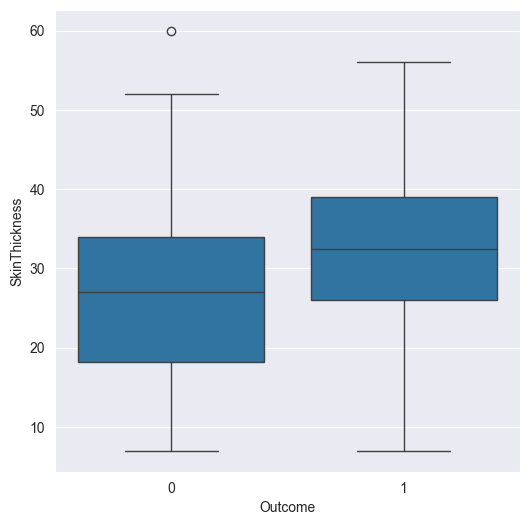

In [51]:
f, ax = plt.subplots(figsize = (6, 6))
fig = sns.boxplot(x = 'Outcome', y = 'SkinThickness', data = new_df)

In [52]:
print('Отсутсвие диабета: ')
p_value = stats.shapiro(df_o0['SkinThickness']).pvalue
if (p_value > 0.05):
  print('H0 - принимается. Нормальный закон распределения. P-value = ', p_value)
else:
  print('H0 - отвергается. Иной вид распределения. P-value = ', p_value)

print('Наличие диабета: ')
p_value = stats.shapiro(df_o1['SkinThickness']).pvalue
if (p_value > 0.05):
  print('H0 - принимается. Нормальный закон распределения. P-value = ', p_value)
else:
  print('H0 - отвергается. Иной вид распределения. P-value = ', p_value)

Отсутсвие диабета: 
H0 - отвергается. Иной вид распределения. P-value =  0.0005746855118826422
Наличие диабета: 
H0 - принимается. Нормальный закон распределения. P-value =  0.9335243201808153


 Несмотря на то, что одна группа подчиняется нормальному закону распределения, воспользуемся статистическим криетрием (непараметрическим) сравнения групп Манна-Утни

In [53]:
if stats.mannwhitneyu(df_o0['SkinThickness'], df_o1['SkinThickness']).pvalue > 0.05:
  print('Статистических значимых отличий нет')
else:
  print("Статистических значимые отличия присутствуют")

Статистических значимые отличия присутствуют


##Вывод по разделу

Были проверены с помощью критериев сравнения групп 6 количественных признаков. Все они являются статистически значимыми относительно группы "Есть сахарный диабет или нет". Это говорит о том, что различия достаточно велики, чтобы маловероятно, что они возникли случайно. Между ними и наличием диабета существует статистическая связь.

#**Корреляционный анализ данных**

Определим наличие или отсутсвие корреляционной связи между двумя количественными факторами. Пусть данные факторами будут являться *Age* и *BMI*. Так как выборка является количественной непрерывной, то будем пользоваться парным критерием Пирсона. Сформулируем нулевую гипотезу:
**Н0 - между двумя факторами отсутсвует корреляционная связь**. Докажем или опровергнем данную гипотезу

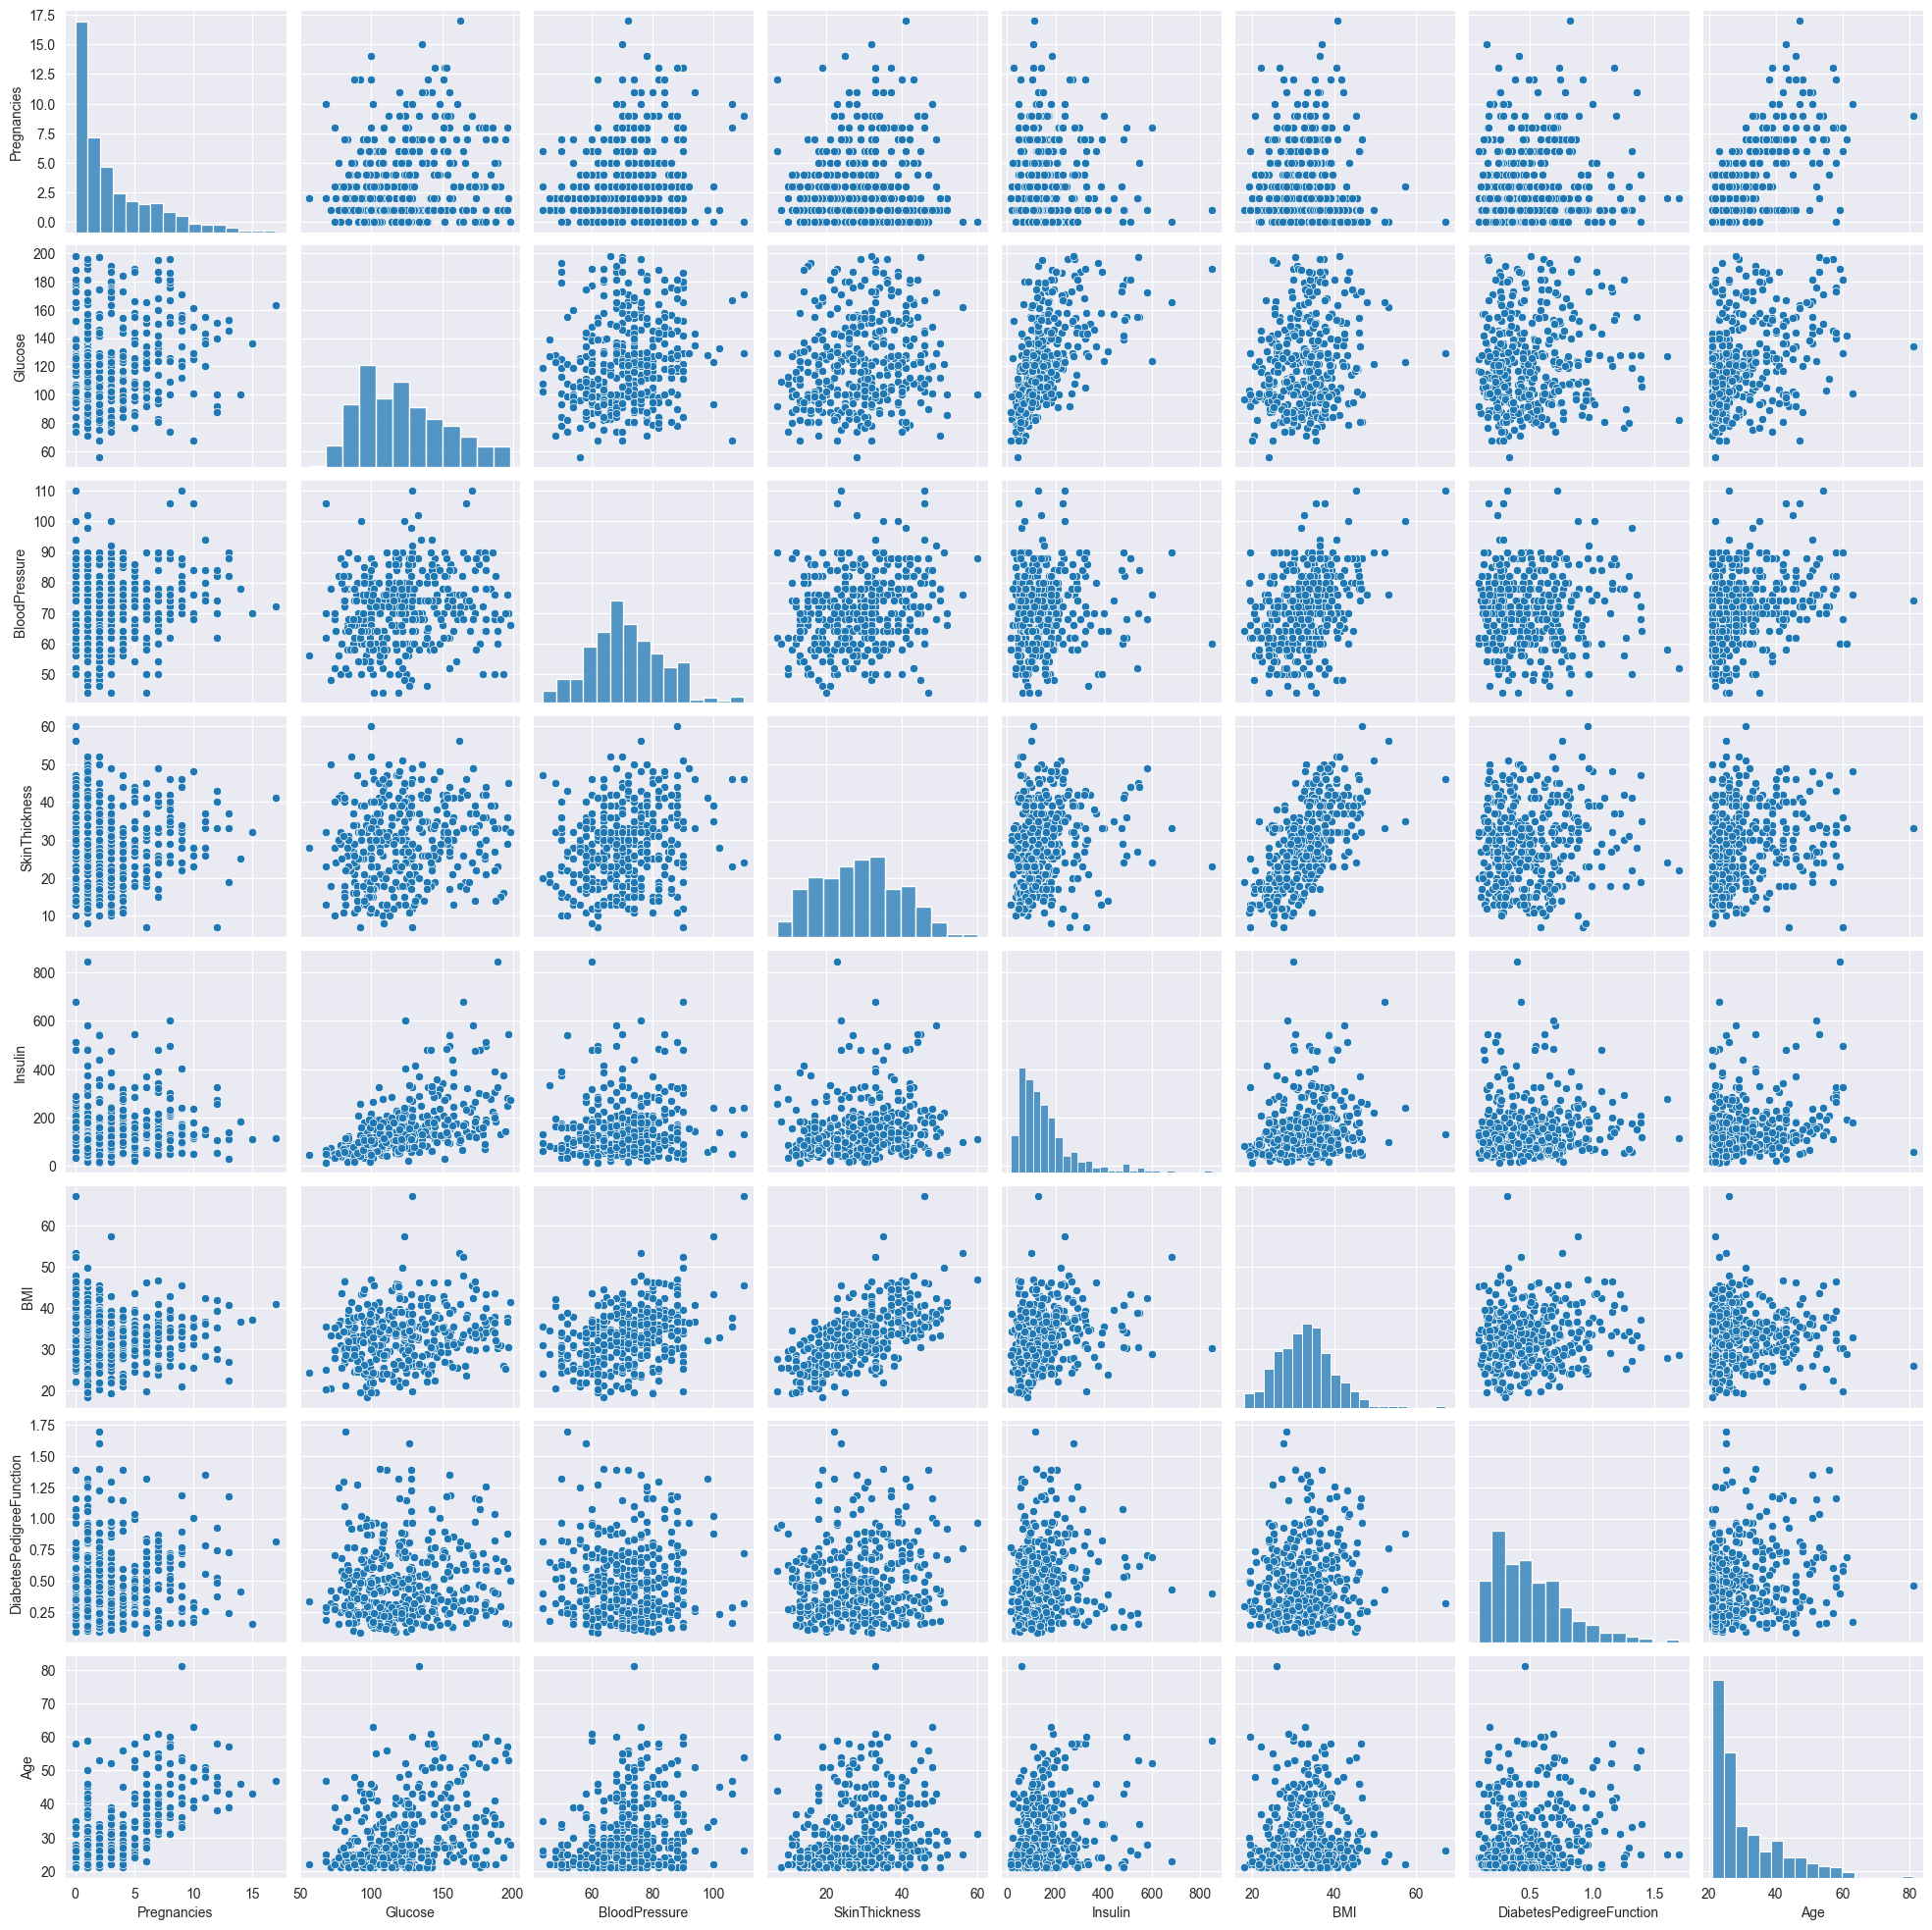

In [54]:
col = ["Pregnancies","Glucose","BloodPressure","SkinThickness", "Insulin","BMI", "DiabetesPedigreeFunction","Age"]
sns.pairplot(new_df[col])
plt.show()

•  Glucose и Insulin: Наблюдается положительная связь, что ожидаемо (более высокий уровень глюкозы может стимулировать выработку инсулина)

•  Glucose и BMI: Наблюдается положительная связь, хотя и не очень сильная

•  BloodPressure и Age: Возможна небольшая положительная связь, что также ожидаемо (с возрастом артериальное давление может повышаться)

•  SkinThickness и BMI: Видна умеренная положительная связь

•  SkinThickness и Insulin: Заметна небольшая положительная корреляция

•  DiabetesPedigreeFunction и Age: Не наблюдается явной взаимосвязи

**Общий вывод:**

•  Взаимосвязи между признаками существуют, но не все они сильные и очевидны. Это говорит о том, что для предсказания диабета необходимо учитывать несколько факторов одновременно

•  Большинство признаков имеют смещенные распределения, что может потребовать преобразования данных перед использованием определенных статистических методов (например, логарифмическое преобразование)

Проверим теперь наши предположения более строго с помощью критерия Пирсона

Выведем матрицу корреляции

In [55]:
new_df[col].corr(method="pearson")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.202595,0.198759,0.106536,0.073219,-0.007535,0.037641,0.680891
Glucose,0.202595,1.000000,0.195407,0.178319,0.576504,0.203316,0.064636,0.352109
BloodPressure,0.198759,0.195407,1.000000,0.250968,0.083260,0.366349,-0.013329,0.309792
SkinThickness,0.106536,0.178319,0.250968,1.000000,0.179617,0.650012,0.090242,0.177144
Insulin,0.073219,0.576504,0.083260,0.179617,1.000000,0.249724,0.064038,0.226501
BMI,-0.007535,0.203316,0.366349,0.650012,0.249724,1.000000,0.090378,0.078684
DiabetesPedigreeFunction,0.037641,0.064636,-0.013329,0.090242,0.064038,0.090378,1.000000,0.115018
Age,0.680891,0.352109,0.309792,0.177144,0.226501,0.078684,0.115018,1.000000


Для лучшей визуализации воспользуемся хитмапом

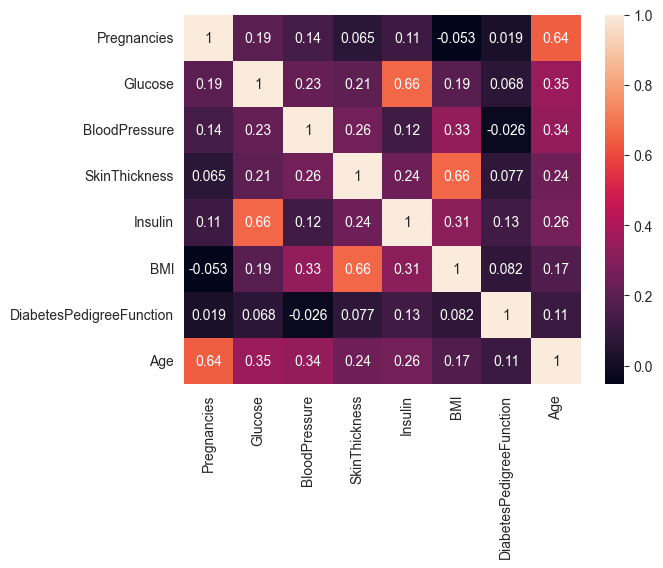

In [56]:
hm = sns.heatmap(new_df[col].corr(method = 'spearman'), annot=True)

Заметим те элементы матрицы(коэффициенты, на пересечении строки и столбца), подозрительные на присутсвия корреляционной связи и проверим с помощью статистического критерия Пирсона

In [57]:
p_value = stats.pearsonr(new_df['Insulin'], new_df['Glucose']).pvalue
if (p_value > 0.05):
  print('p-value = ', p_value, " H0 доказана. Между Insulin и Glucose отсутсвует корреляционная связь")
else:
  print('p-value = ', p_value, " H0 опровергнута. Между Insulin и Glucose присутствует корреляционная связь")

p-value =  2.165543638454158e-35  H0 опровергнута. Между Insulin и Glucose присутствует корреляционная связь


In [58]:
p_value = stats.pearsonr(new_df['Age'], new_df['Pregnancies']).pvalue
if (p_value > 0.05):
  print('p-value = ', p_value, " H0 доказана. Между Age и Pregnancies отсутсвует корреляционная связь")
else:
  print('p-value = ', p_value, " H0 опровергнута. Между Age и Pregnancies присутствует корреляционная связь")

p-value =  1.2782912497822835e-53  H0 опровергнута. Между Age и Pregnancies присутствует корреляционная связь


In [59]:
p_value = stats.pearsonr(new_df['SkinThickness'], new_df['BMI']).pvalue
if (p_value > 0.05):
  print('p-value = ', p_value, " H0 доказана. Между SkinThickness и BMI отсутсвует корреляционная связь")
else:
  print('p-value = ', p_value, " H0 опровергнута. Между SkinThickness и BMI присутствует корреляционная связь")

p-value =  1.7799575391661434e-47  H0 опровергнута. Между SkinThickness и BMI присутствует корреляционная связь


##**Вывод**

Я выявил статистически значимые связи между ключевыми медицинскими показателями: уровень инсулина положительно коррелирует с глюкозой, что подтверждает физиологическую зависимость углеводного обмена; возраст связан с числом беременностей, что логично с точки зрения репродуктивной истории; толщина кожной складки коррелирует с индексом массы тела, отражая взаимосвязь между подкожным жиром и общей массой тела. Эти результаты подтверждают достоверность данных и могут быть полезны для построений моделей

#**Машинное обучение**

Графиически изобразим количественные данные относительно категориальных

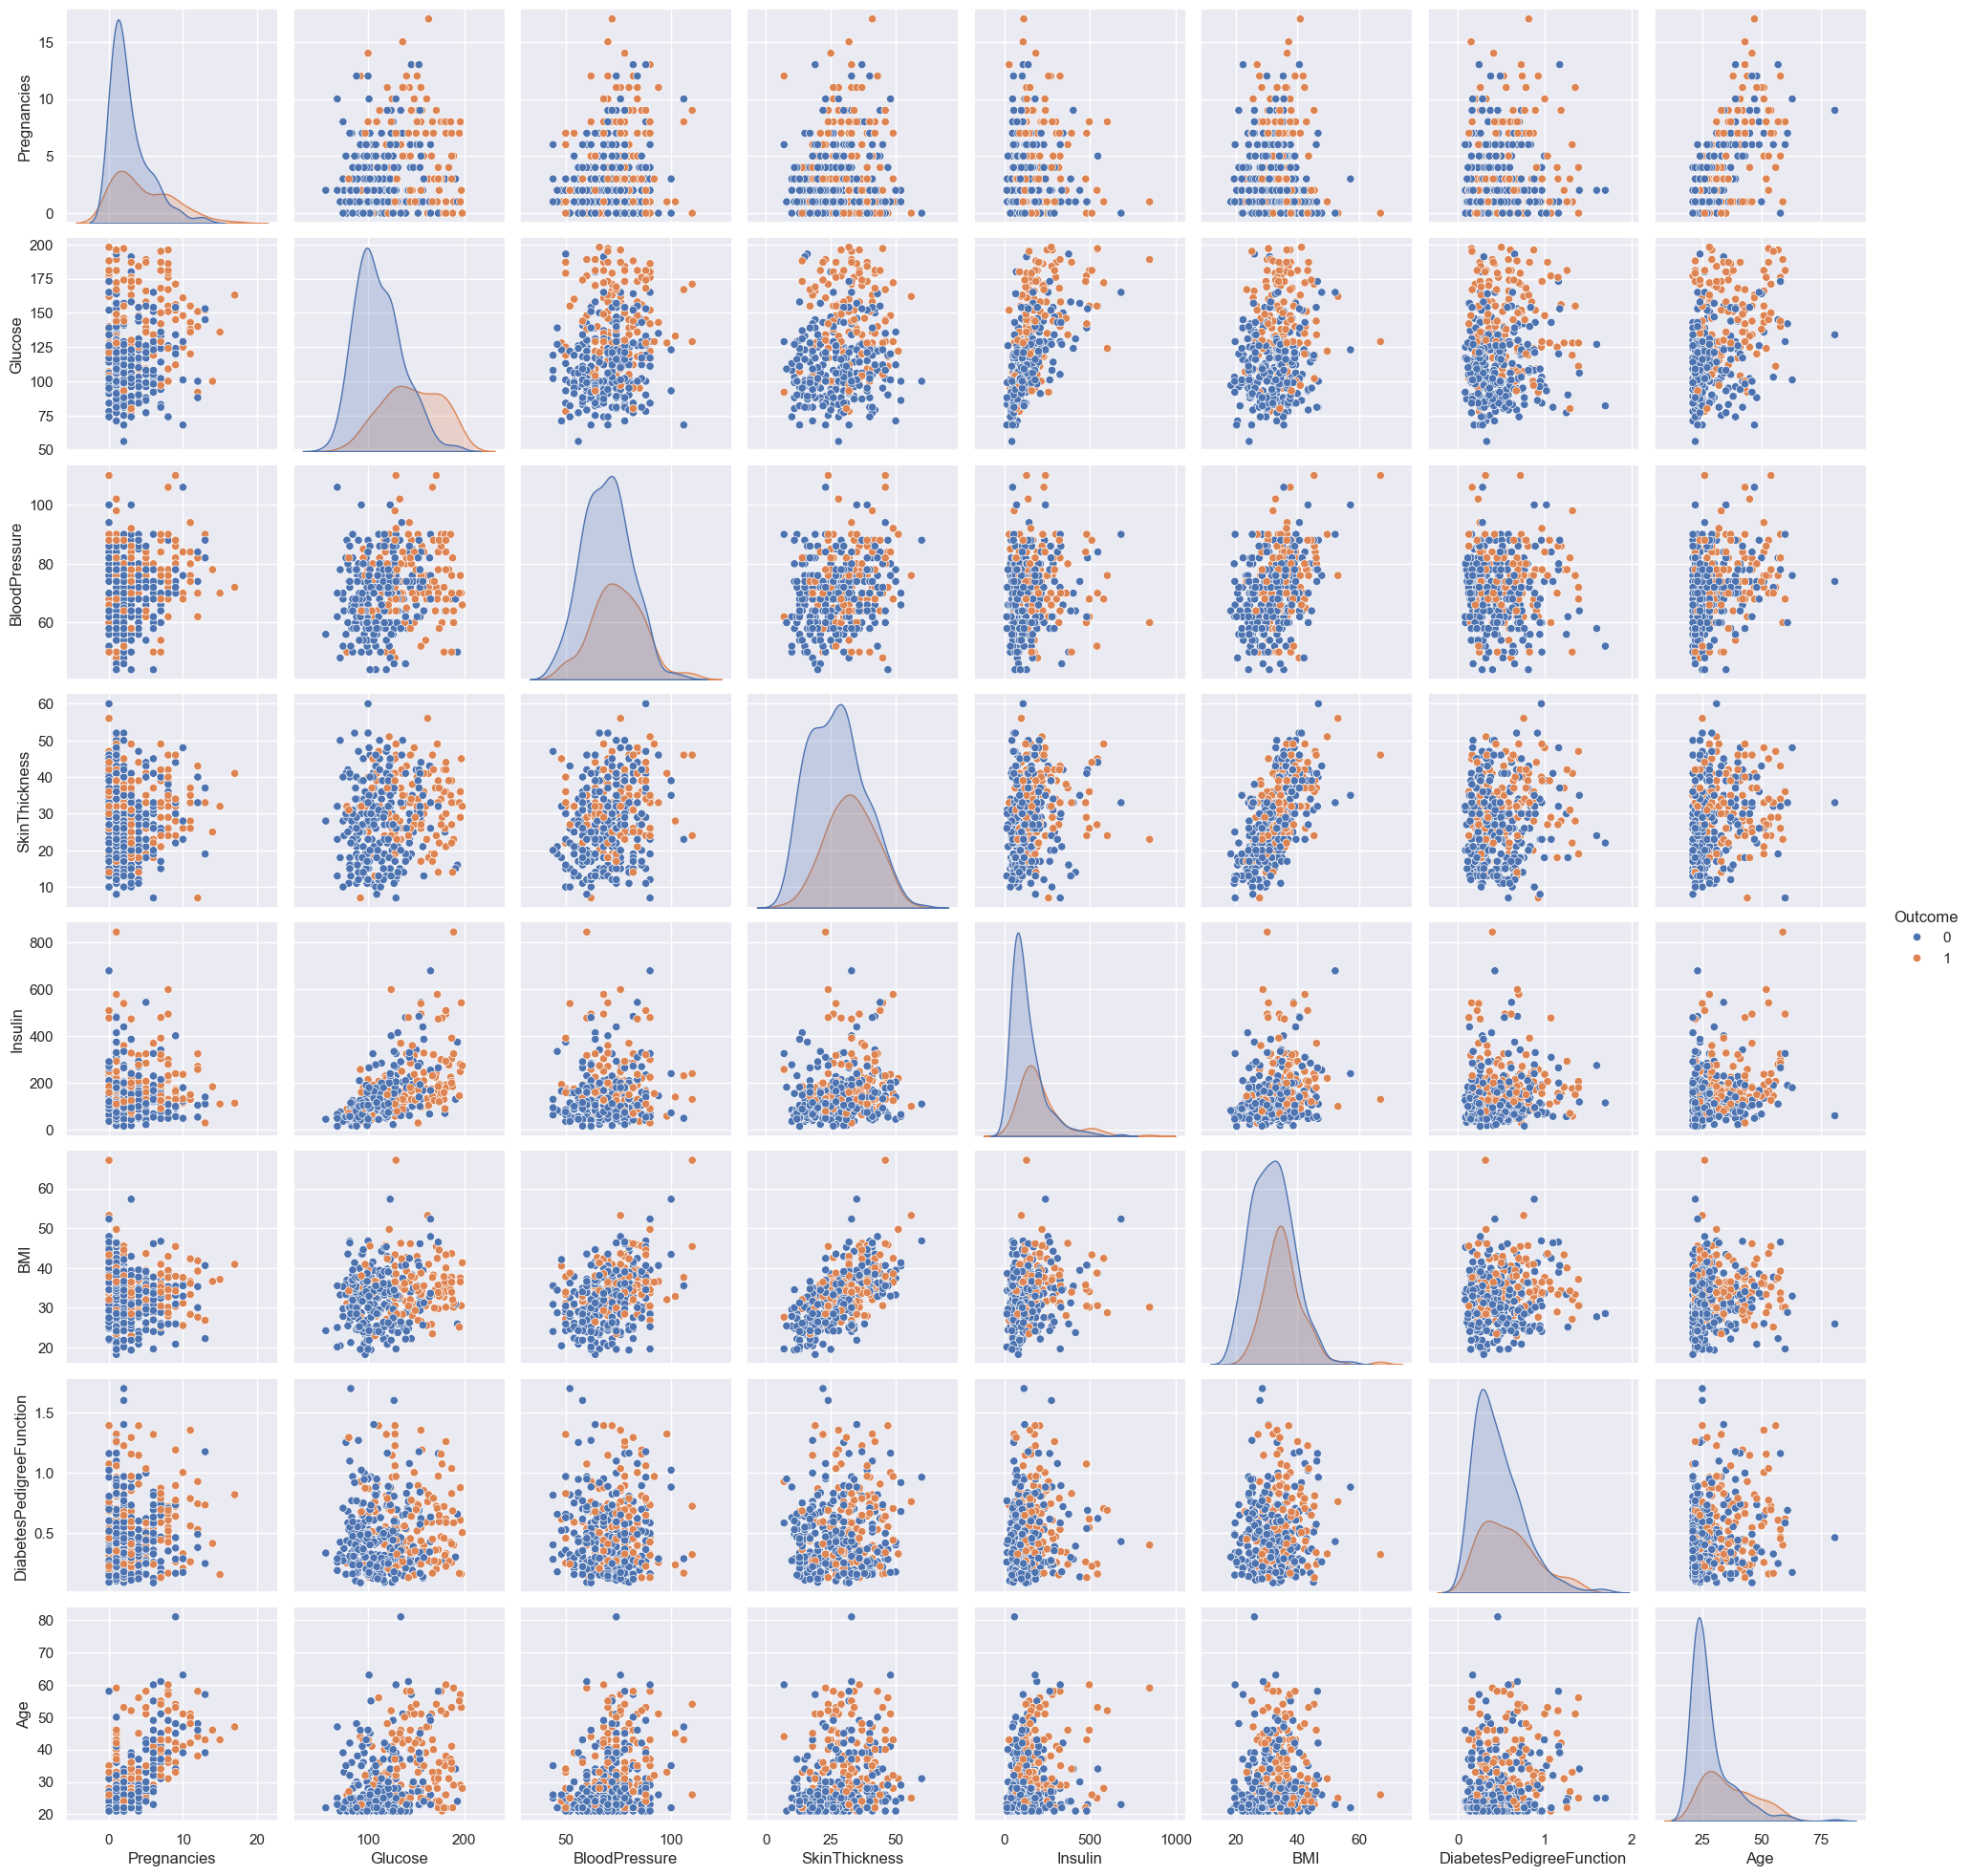

In [107]:
sns.set()
sns.pairplot(new_df, hue='Outcome')

##Логистическая регрессия

Рассмотрим, как будут расположены данные у количественного показателя Glucose и категорииального Outcome. Данный количественный признак был выбран, поскольку он является линейным разделимым по сравнению с другими признаками. Такой вывод можно сделать исходя из бокплота и пэрплота: размах данных находится на разных уровнях относительно Outcome и набор категориальных признаков на пэрплоте можно разграничить кривой. Сделаем предположение, что модель логистической регрессии будет неплохо обучаться на данном наборе. Посмотрим, как это будет выглядеть на практике

<Axes: xlabel='Glucose', ylabel='Outcome'>

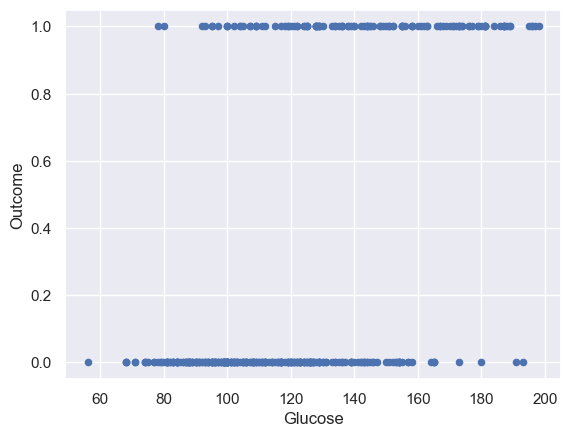

In [106]:
new_df.plot('Glucose','Outcome',kind="scatter")

###Разбиение на train и test

In [108]:
X2=new_df[['Glucose', 'Pregnancies', 'BMI', 'Age', 'Insulin', 'SkinThickness']] #независимый фактор (объясняющий)
Y2=new_df['Outcome'] #зависимый фактор (объясняемый)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=1) #разбиение наблюдений на train и test в соотношении 70:30

Посмотрим на соотвествующие размеры тренеровочной и обучаемой выборки

In [109]:
print('Data size: ', new_df.shape[0])
print('Train data size: ', X2_train.shape[0])
print('Test data size: ', X2_test.shape[0])

Data size:  384
Train data size:  268
Test data size:  116


Рассмотрим отдельно на тестовую выборку и обучаемую выборку

In [110]:
X2_train

,Glucose,Pregnancies,BMI,Age,Insulin,SkinThickness
515,163,3,31.6,28,105,18
186,181,8,30.1,60,495,36
130,173,4,29.7,33,168,14
534,77,1,33.3,24,56,30
338,152,9,34.2,33,171,34
...,...,...,...,...,...,...
412,143,1,42.4,22,310,23
511,139,0,22.1,21,210,17
157,109,1,25.2,23,135,21
469,154,6,46.1,27,140,41


In [111]:
X2_test

,Glucose,Pregnancies,BMI,Age,Insulin,SkinThickness
514,99,3,25.6,24,86,19
225,87,1,34.6,22,32,27
265,96,5,33.6,43,67,18
136,100,0,30.8,21,50,26
377,87,1,37.2,22,75,37
...,...,...,...,...,...,...
650,91,1,25.2,23,100,25
765,121,5,26.2,30,112,23
487,173,0,46.5,58,265,32
70,100,2,32.9,28,90,20


###Обучение модели

Обучим логистическую модель на тренировочных данных. Логистическая модель была выбрана поскольку она хорошо справляется с бинарной классификацией и неплохо справляется с обучением за малое время

In [112]:
LogReg = LogisticRegression()
modelLR=LogReg.fit(X2_train,Y2_train)

Посмотрим на коэфициенты а и b

In [113]:
print(modelLR.intercept_) #коэффициент а
print(modelLR.coef_) #коэфициент b

[-9.82106364]
[[0.03573768 0.10079366 0.07973427 0.04413489 0.00042072 0.00019187]]


Построим график сигмоиды

RuntimeError: `logistic=True` requires statsmodels, an optional dependency, to be installed.

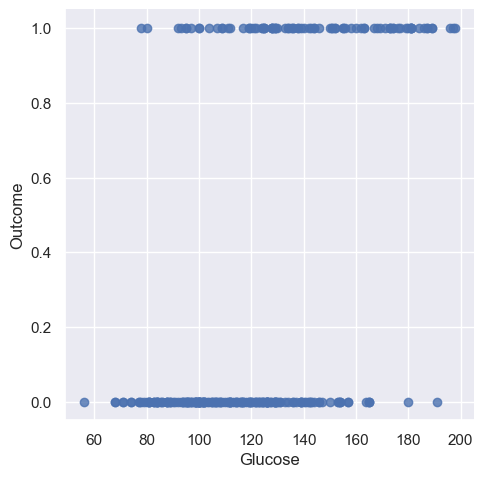

In [114]:
sns.lmplot(x='Glucose', y='Outcome', data=new_df.loc[[x for x in X2_train.index]], logistic=True)

###Проверка качества модели

Сделаем предсказание на тренеровочной и тестовой выборке

In [115]:
Y2_train_pred=modelLR.predict(X2_train)
Y2_test_pred=modelLR.predict(X2_test)

Построим матриицу неточностей

In [116]:
pd.DataFrame(confusion_matrix(Y2_test, Y2_test_pred))

,0,1
0,69,10
1,17,20


24 признака из 116 были классифицированы неверно, это порядка 21% от общего числа выборки. С трудом можно сказать, что модель хорошо обучилась. Посмотрим на остальные метриики и проанализируем их

In [117]:
print(classification_report(Y2_test, Y2_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84        79
           1       0.67      0.54      0.60        37

    accuracy                           0.77       116
   macro avg       0.73      0.71      0.72       116
weighted avg       0.76      0.77      0.76       116


С нулевым классом результаты обучения гораздо лучше, чем у класса 1. f1-score, полнота и  точность лучше у нулевого класса. Метрика Accuracy - 0,79. Результат впринципе неплохой, но возможно стоит задуматься о других моделей машинного обучения. Возможно они дадут более точный результат

In [118]:
QualityMetrics=['Accuracy train','Accuracy test', 'F1 Score train','F1 Score test']
Classification2=pd.DataFrame(index=QualityMetrics)
Classification2.at[QualityMetrics,'Logistic Regression']=[accuracy_score(Y2_train,Y2_train_pred),
                                                accuracy_score(Y2_test,Y2_test_pred),
                                                f1_score(Y2_train,Y2_train_pred),
                                                f1_score(Y2_test,Y2_test_pred)]
Classification2

,Logistic Regression
Accuracy train,0.787313
Accuracy test,0.767241
F1 Score train,0.650307
F1 Score test,0.597015


Видим, что модель впринципе неплохо справляется со своей задачей. Accuracy train и Accuracy test сильно не отличаются. Но трудно сказать, что результат близок к 1. Ситуация с F1 Score немного иначе. Разница существенна между обучаемой и тестовой выборкой. Такие показатели могут говорить о дисбалансе классов. Посмотрим на рок кривую

In [119]:
fpr, tpr, threshold = roc_curve(Y2_train,Y2_train_pred)
roc_auc = auc(fpr, tpr)
roc_auc

np.float64(0.7390935911116691)

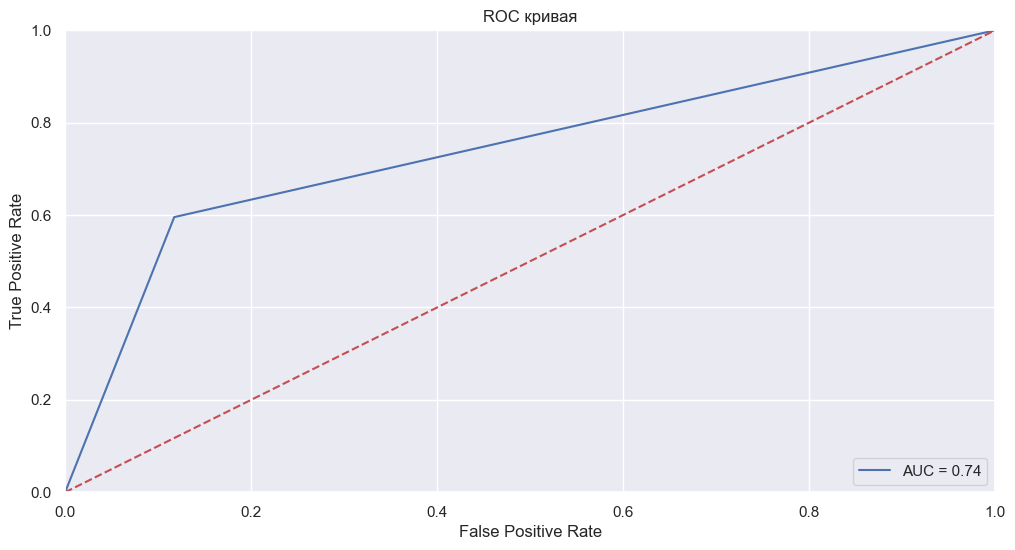

In [120]:
plt.figure(figsize=(12, 6))
plt.title('ROC кривая')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Действительно, дисбаланс возниикает у единичного класса, auc далека от 1. Это может свидетельствовать о том, что модель ошибается при классиификации данных  

Попробуем задать другое пороговое значение и посмотрим на точность обучение модели

In [121]:
threshold = []
for threshold1 in np.arange(0.05, 0.95, 0.05):
  Y2_test_pred = np.where(modelLR.predict_proba(X2_test)[:,1] > threshold1, 1, 0)
  threshold.append(accuracy_score(Y2_test,Y2_test_pred))

In [122]:
threshold

[0.46551724137931033,
 0.5948275862068966,
 0.6896551724137931,
 0.7068965517241379,
 0.7413793103448276,
 0.7586206896551724,
 0.7672413793103449,
 0.7844827586206896,
 0.7586206896551724,
 0.7672413793103449,
 0.7672413793103449,
 0.7672413793103449,
 0.7931034482758621,
 0.7758620689655172,
 0.7931034482758621,
 0.75,
 0.7327586206896551,
 0.7068965517241379]

Text(0, 0.5, 'Accuracy')

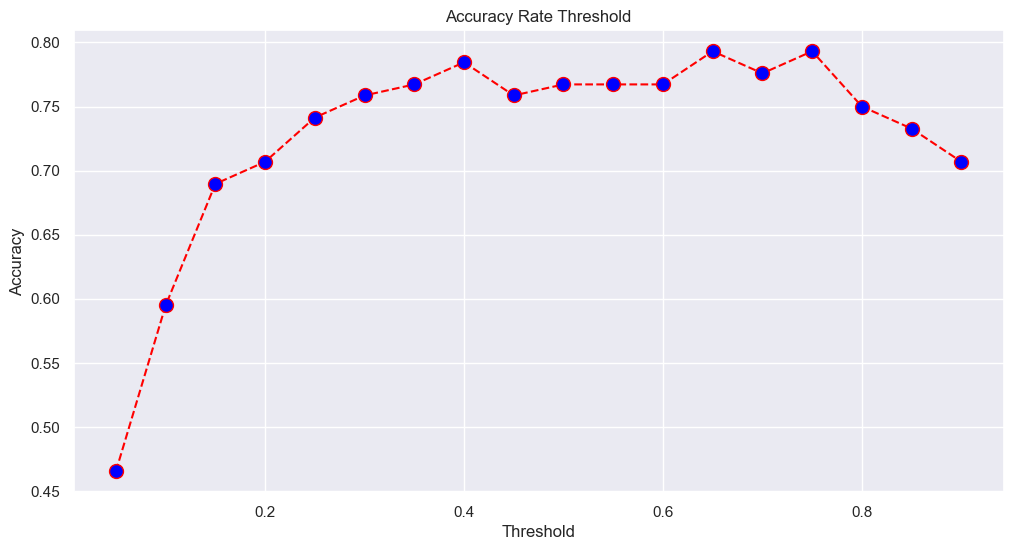

In [123]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(0.05, 0.95, 0.05), threshold, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate Threshold')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')

В целом, в диапазоне от 0,6 до 0,8 модель показывает лучшие результаты

###Прогноз

In [124]:
x_new = [
    [120, 2, 28.5, 35, 80, 25],  
    [140, 1, 32.0, 45, 95, 30],   
    [90,  0, 22.0, 25, 50, 15]    
]
y_new_glucose = modelLR.predict(x_new)
Classification2.at['Forecast','Logistic Regression']=y_new_glucose.round(2)[0]
print('Прогноз:',y_new_glucose.round(2)[0])
Classification2

Прогноз категории глюкозы: 0


C:\Users\ilyak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,Logistic Regression
Accuracy train,0.787313
Accuracy test,0.767241
F1 Score train,0.650307
F1 Score test,0.597015
Forecast,0.000000


###**Вывод по логистичесой регрессии**

В принципе, классификатор сработал неплохо: модель не переобучилась, доля правильных ответов на тестовой выборке около 75%. Значительные улучшения у f1-score, но результат все равно далек от 1, поэтому такой моделе свойственно ошибаться и модель нуждается в улучшении, чтобы приблизиться к идеальному классификатору

##Метод опорных векторов

###Обучение модели

Воспользуемся радиальной базисной функцией для более точного обучения

In [128]:
svc_classifier = SVC(kernel='rbf', gamma='scale')
modelSVC2_rbf=svc_classifier.fit(X2_train,Y2_train) #обучение на train

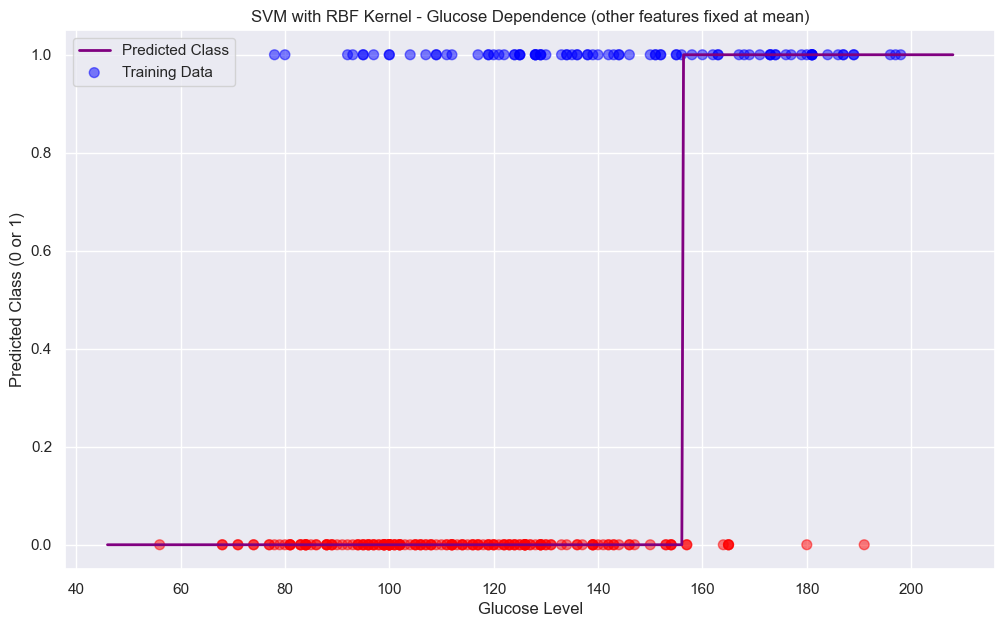

In [129]:
fig, ax = plt.subplots(figsize=(12, 7))

mean_values = X2_train.mean()
xx_glucose = np.linspace(X2_train['Glucose'].min() - 10, X2_train['Glucose'].max() + 10, 500)

predict_data = pd.DataFrame({
    'Glucose': xx_glucose,
    'Pregnancies': mean_values['Pregnancies'],
    'BMI': mean_values['BMI'],
    'Age': mean_values['Age'],
    'Insulin': mean_values['Insulin'],
    'SkinThickness': mean_values['SkinThickness']
})

predict_data = predict_data[X2_train.columns]

Z = modelSVC2_rbf.predict(predict_data)

ax.plot(xx_glucose, Z, color='purple', linewidth=2, label='Predicted Class')

colors_train = np.where(Y2_train == 1, 'blue', 'red')
ax.scatter(X2_train['Glucose'], Y2_train, c=colors_train, marker='o', s=50, alpha=0.5, label='Training Data')

ax.set_xlabel('Glucose Level')
ax.set_ylabel('Predicted Class (0 or 1)')
ax.set_title('SVM with RBF Kernel - Glucose Dependence (other features fixed at mean)')
ax.legend()
plt.grid(True)
plt.show()

###Проверка качества модели

Предсказание на обучаемой и тестовой выборки

In [130]:
Y2_train_pred_poly=modelSVC2_rbf.predict(X2_train) #предсказание на train
Y2_test_pred_poly=modelSVC2_rbf.predict(X2_test) #предсказание на test

Посмотрим на матрицу неточности

In [131]:
pd.DataFrame(confusion_matrix(Y2_test, Y2_test_pred_poly)) #матрица неточностей

,0,1
0,73,6
1,17,20


Видно что доля неверно выявленных единичного класса уменьшилось по сравнению с логистиической регрессией. Вероятно, модель будет давать более точные оценки нулевого класса

In [132]:
print(classification_report(Y2_test, Y2_test_pred_poly))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        79
           1       0.77      0.54      0.63        37

    accuracy                           0.80       116
   macro avg       0.79      0.73      0.75       116
weighted avg       0.80      0.80      0.79       116


Метрика f1-score несильно увеличилось у единичного класса, что подтверждает дисбаланс классов, но качество обучение стало лучше

In [133]:
Classification2.at[QualityMetrics,'SVC']=[accuracy_score(Y2_train,Y2_train_pred_poly),
                                                accuracy_score(Y2_test,Y2_test_pred_poly),
                                                f1_score(Y2_train,Y2_train_pred_poly),
                                                f1_score(Y2_test,Y2_test_pred_poly)]
Classification2

,Logistic Regression,SVC
Accuracy train,0.787313,0.787313
Accuracy test,0.767241,0.801724
F1 Score train,0.650307,0.601399
F1 Score test,0.597015,0.634921
Forecast,0.000000,NaN


SVC по точности не отстает от логистиической регрессии, но изменились показатели F1-score, что говорит о лучшей устойчивости к дисбалансу классов

###Прогноз

In [135]:
x_new = [
    [120, 2, 28.5, 35, 80, 25],  # Первый пациент
    [140, 1, 32.0, 45, 95, 30],   # Второй пациент
    [90,  0, 22.0, 25, 50, 15]    # Третий пациент
]

y_new_glucose = modelSVC2_rbf.predict(x_new)
print('Прогноз:', y_new_glucose)

Classification2.at['Forecast','SVC'] = y_new_glucose[0]
Classification2

Прогноз: [0 0 0]


C:\Users\ilyak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


,Logistic Regression,SVC
Accuracy train,0.787313,0.787313
Accuracy test,0.767241,0.801724
F1 Score train,0.650307,0.601399
F1 Score test,0.597015,0.634921
Forecast,0.000000,0.000000


###**Вывод по методу опорных векторов**

На тестовых данных Logistic Regression и SVC имеют примерно одинаковую точность, однако Logistic Regression демонстрирует значительно лучшую F1-меру, что указывает на ее превосходство в балансировании точности и полноты, а также точность обучение на тестовой выборке значительно лучше

##Метод К-ближайших соседей

###Разбиение на test и train

Стандартизация тестовой и обучаемой выборки

In [136]:
scaler = StandardScaler()
X2_train_scaled = pd.DataFrame(scaler.fit_transform(X2_train))
X2_test_scaled = pd.DataFrame(scaler.transform(X2_test))

###Обучение модели

Выберим число ближайших соседей, пусть это будет 5

In [137]:
modelKNN = KNeighborsClassifier(n_neighbors = 5)
modelKNN.fit(X2_train_scaled, Y2_train)

KNeighborsClassifier()

###Проверка качества модели

In [138]:
Y4_train_pred = modelKNN.predict(X2_train_scaled)
Y4_test_pred = modelKNN.predict(X2_test_scaled)

Построим матрицу неточностей

In [139]:
pd.DataFrame(confusion_matrix(Y2_test, Y4_test_pred))

,0,1
0,71,8
1,17,20


Выведим Accuracy и F1-score

In [140]:
# Заполняем метрики для KNN (отдельно для каждого значения)
Classification2.at['Accuracy train', 'KNN'] = accuracy_score(Y2_train, Y4_train_pred)
Classification2.at['Accuracy test', 'KNN'] = accuracy_score(Y2_test, Y4_test_pred)
Classification2.at['F1 Score train', 'KNN'] = f1_score(Y2_train, Y4_train_pred, average='weighted') #Use weighted average
Classification2.at['F1 Score test', 'KNN'] = f1_score(Y2_test, Y4_test_pred, average='weighted') #Use weighted average
Classification2

,Logistic Regression,SVC,KNN
Accuracy train,0.787313,0.787313,0.835821
Accuracy test,0.767241,0.801724,0.784483
F1 Score train,0.650307,0.601399,0.832549
F1 Score test,0.597015,0.634921,0.775370
Forecast,0.000000,0.000000,NaN


Можно увидеть изменения у KNN. Точность, как и у остальных двух несильно изменилась. Модель неплохо обучается на данных. Значительные улучшения в сторону f1-score. Что у обучаемой, что на тестовой выборки показатели около 77%. Это говорит о том, что модель устойчива к дисбалансу классов

Посмотрим, можно ли будет миинимизировать среднюю ошибку предсказаний с помощью числа соседей

In [150]:
error = []
min_k = 0
min_error = 1
for i in range(1, 40):
  modelKNN = KNeighborsClassifier(n_neighbors = i)
  modelKNN.fit(X2_train, Y2_train)
  Y4_test_pred = modelKNN.predict(X2_test)
  if min_error > np.mean(Y4_test_pred != Y2_test):
    min_error = np.mean(Y4_test_pred != Y2_test)
    min_k = i
  error.append(np.mean(Y4_test_pred != Y2_test)) #средняя ошибка для предсказанных значений тестового набора
min_k

35

Text(0, 0.5, 'Mean Error')

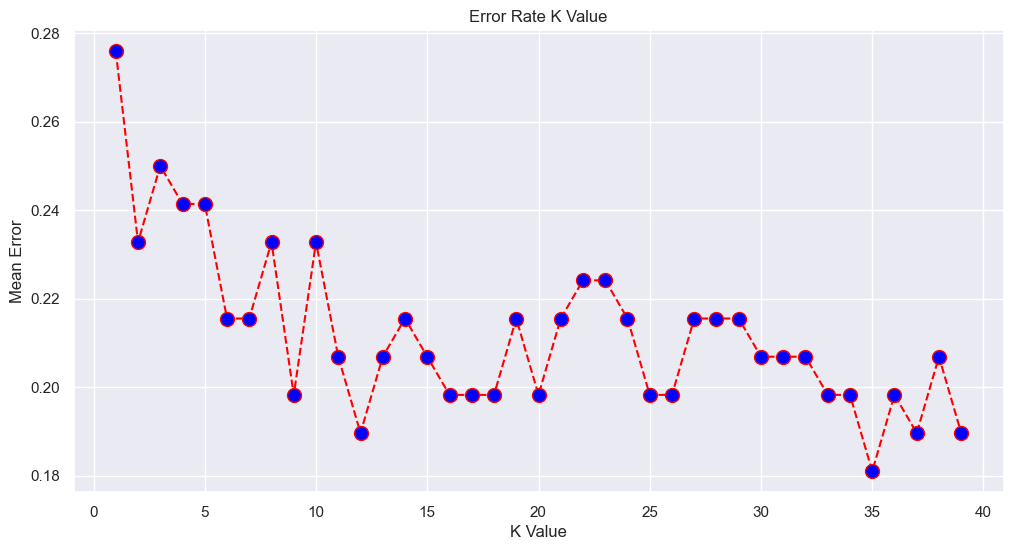

In [142]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Заметим, что минимальная ошибка составляет при 35 K-value. Обучим нашу модель на этом числе соседей и посмотрим изменения в матрице неточностей и на значения Accuracy и F1-score

In [151]:
modelKNN = KNeighborsClassifier(n_neighbors = 35)
modelKNN.fit(X2_train_scaled, Y2_train)

KNeighborsClassifier(n_neighbors=35)

In [152]:
Y4_train_pred = modelKNN.predict(X2_train_scaled)
Y4_test_pred = modelKNN.predict(X2_test_scaled)

In [153]:
pd.DataFrame(confusion_matrix(Y2_test, Y4_test_pred))

,0,1
0,70,9
1,19,18


In [154]:
# Заполняем метрики для KNN (отдельно для каждого значения)
Classification2.at['Accuracy train', 'KNN'] = accuracy_score(Y2_train, Y4_train_pred)
Classification2.at['Accuracy test', 'KNN'] = accuracy_score(Y2_test, Y4_test_pred)
Classification2.at['F1 Score train', 'KNN'] = f1_score(Y2_train, Y4_train_pred, average='weighted') #Use weighted average
Classification2.at['F1 Score test', 'KNN'] = f1_score(Y2_test, Y4_test_pred, average='weighted') #Use weighted average
Classification2

,Logistic Regression,SVC,KNN
Accuracy train,0.787313,0.787313,0.791045
Accuracy test,0.767241,0.801724,0.758621
F1 Score train,0.650307,0.601399,0.779121
F1 Score test,0.597015,0.634921,0.746947
Forecast,0.000000,0.000000,NaN


KNN демонстрирует потенциально высокую производительность благодаря хорошей точности и F1-мере, указывающим на сбалансированную классификацию

###Прогноз

In [159]:
x_new = [
    [120, 2, 28.5, 35, 80, 25],  # Первый пациент
    [140, 1, 32.0, 45, 95, 30],   # Второй пациент
    [90,  0, 22.0, 25, 50, 15]    # Третий пациент
]
y_new_glucose = modelKNN.predict(x_new)
print('Прогноз:',y_new_glucose)
Classification2.at['Forecast','KNN']=y_new_glucose[0]
Classification2

Прогноз: [1 1 1]


,Logistic Regression,SVC,KNN
Accuracy train,0.787313,0.787313,0.791045
Accuracy test,0.767241,0.801724,0.758621
F1 Score train,0.650307,0.601399,0.779121
F1 Score test,0.597015,0.634921,0.746947
Forecast,0.000000,1.000000,1.000000


###**Вывод по KNN**

KNN показал лучшие результаты на тестовой выборке по F1-score и значительно неплохие результаты по Accuracy, что делает его перспективной моделью для данной задачи. Заметна также устойчивость к дисбалансу классов. Я предполагаю, это происходит за счет нормализации данных и учет взвешенного голосования каждого класса

##Наивный Байесовский классификатор

###Обучение модели

In [160]:
gnb = GaussianNB()
modelGNB=gnb.fit(X2_train,Y2_train)

###Проверка качества модели

In [161]:
Y3_train_pred=modelGNB.predict(X2_train)
Y3_test_pred=modelGNB.predict(X2_test)

In [162]:
pd.DataFrame(confusion_matrix(Y2_test, Y3_test_pred))

,0,1
0,66,13
1,15,22


In [163]:
print(classification_report(Y2_test, Y3_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        79
           1       0.63      0.59      0.61        37

    accuracy                           0.76       116
   macro avg       0.72      0.72      0.72       116
weighted avg       0.76      0.76      0.76       116


In [164]:
Classification2.at['Accuracy train', 'Naive Bayes'] = accuracy_score(Y2_train, Y3_train_pred)
Classification2.at['Accuracy test', 'Naive Bayes'] = accuracy_score(Y2_test, Y3_test_pred)
Classification2.at['F1 Score train', 'Naive Bayes'] = f1_score(Y2_train, Y3_train_pred, average='weighted')
Classification2.at['F1 Score test', 'Naive Bayes'] = f1_score(Y2_test, Y3_test_pred, average='weighted')
Classification2

,Logistic Regression,SVC,KNN,Naive Bayes
Accuracy train,0.787313,0.787313,0.791045,0.768657
Accuracy test,0.767241,0.801724,0.758621,0.758621
F1 Score train,0.650307,0.601399,0.779121,0.764915
F1 Score test,0.597015,0.634921,0.746947,0.756777
Forecast,0.000000,1.000000,1.000000,NaN


На основании представленных данных, Наивный Байесовский классификатор показывает приемлемые результаты, но не превосходит KNN в данном случае. Accuracy на тестовой выборке у Наивного Байеса (0.758621) сопоставима с Logistic Regression и SVC, но ниже, чем у SVC (0.801724). F1-score на тестовой выборке у Наивного Байеса (0.756777) немного выше, чем у KNN (0.746947)

###Прогноз

In [165]:
x_new = [
    [120, 2, 28.5, 35, 80, 25],  # Первый пациент
    [140, 1, 32.0, 45, 95, 30],   # Второй пациент
    [90,  0, 22.0, 25, 50, 15]    # Третий пациент
]
y_new_glucose = modelGNB.predict(x_new)
Classification2.at['Forecast','Naive Bayes']=y_new_glucose.round(2)[0]
print('Прогноз категории глюкозы:',y_new_glucose.round(2)[0])
Classification2

Прогноз категории глюкозы: 0


C:\Users\ilyak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


,Logistic Regression,SVC,KNN,Naive Bayes
Accuracy train,0.787313,0.787313,0.791045,0.768657
Accuracy test,0.767241,0.801724,0.758621,0.758621
F1 Score train,0.650307,0.601399,0.779121,0.764915
F1 Score test,0.597015,0.634921,0.746947,0.756777
Forecast,0.000000,1.000000,1.000000,0.000000


###**Вывод по Наивному Байесовскому классификатору**

Наивный Байес продемонстрировал неплохую производительность, особенно в отношении F1-score на тестовой выборке, что делает его неплохим кандидатом для быстрого прототипирования или в ситуациях, когда предполагается независимость признаков. Однако, если приоритетом является максимальная точность, KNN и SVC может быть более подходящим выбором, но стоит также рассмотреть возможность использования ансамблей моделей для потенциального повышения общей производительности.

##Случайный лес

###Обучение модели

In [174]:
# Создание модели
rf_model = RandomForestClassifier(
    n_estimators=10,  
    max_depth=5,       
    random_state=42,
    class_weight='balanced'
)

# Обучение модели
rf_model.fit(X2_train, Y2_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=10,
                       random_state=42)

###Проверка качества модели

In [175]:
Y3_train_pred=rf_model.predict(X2_train)
Y3_test_pred=rf_model.predict(X2_test)

In [176]:
pd.DataFrame(confusion_matrix(Y2_test, Y3_test_pred))

,0,1
0,66,13
1,13,24


In [177]:
print(classification_report(Y2_test, Y3_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        79
           1       0.65      0.65      0.65        37

    accuracy                           0.78       116
   macro avg       0.74      0.74      0.74       116
weighted avg       0.78      0.78      0.78       116


 #**Общий вывод по работе**

В данной работе я провел предобработку данных с целью избавиться от анамальных данных, которые могут сильно влиять на статистистику и на качество обучения моделей. В ходе анализа были выявлены статистически значимые связи между ключевыми медицинскими показателями и наличием диабета, что подтверждает их важность для диагностики. Исследование корреляций между признаками подтвердило логичность и достоверность данных. При сравнении алгоритмов классификации KNN показал наилучшие результаты по accuracy и F1-score, что делает его перспективной моделью. Logistic Regression также продемонстрировала хорошую сбалансированность точности и полноты. Наивный Байес, несмотря на некоторые ограничения, может быть полезен для быстрого прототипирования. В целом, классификаторы работают удовлетворительно, но есть потенциал для их улучшения, например, путем использования ансамблей моделей для повышения общей точности.

#**Загрузка моделей**

In [104]:
import joblib

# Сохраняем модель
joblib.dump(modelGNB, "modelKNN.pkl")
joblib.dump(modelLR, "modelLR.pkl")

['modelLR.pkl']

In [105]:
# Предсказания от базовых моделей
knn_preds = modelKNN.predict(X2_train)
lp_preds = modelLR.predict(X2_train)
# Создаем обучающий набор для третьей модели
X_final = np.column_stack((knn_preds, lp_preds))  # Комбинируем прогнозы

# Разделяем данные на обучающую и тестовую выборку
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, Y2_train, test_size=0.2, random_state=42)

# Третья модель (например, логистическая регрессия)
final_model = LogisticRegression()
final_model.fit(X_train_final, y_train_final)

# Тестируем модель
score = final_model.score(X_test_final, y_test_final)
print(f"Accuracy of the final model: {score * 100:.2f}%")

# Сохраняем третью модель
joblib.dump(final_model, "final_model.pkl")


Accuracy of the final model: 68.52%


C:\Users\ilyak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


['final_model.pkl']